In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/Users/admin/Downloads/EBAC/dataframesEbac")

In [2]:
df = pd.read_csv("kc house data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df["Intercepto"] = 1
df = df[['Intercepto', 'bedrooms', 'bathrooms', 'sqft_living',
         'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
         'grade', 'sqft_above', 'sqft_basement', 'lat', 
         'sqft_living15', 'sqft_lot15', "price"]]

In [4]:
Xdata = df[['Intercepto', 'bedrooms', 'bathrooms', 'sqft_living',
         'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
         'grade', 'sqft_above', 'sqft_basement', 'lat', 
         'sqft_living15', 'sqft_lot15']].values
Ydata = df[["price"]].values

In [5]:
# Bases de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.3, random_state = 42) 

In [6]:
x = x_train
y = y_train

In [7]:
# Para el formato numerico
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [8]:
XT_X = np.matmul(np.matrix.transpose(x), x)
XT_X

array([[15129.000000, 50920.000000, 31950.000000, 31371248.000000,
        226817902.000000, 22698.500000, 107.000000, 3505.000000,
        51554.000000, 115786.000000, 27025457.000000, 4345791.000000,
        719544.185800, 29987816.000000, 194008745.000000],
       [50920.000000, 184576.000000, 113098.500000, 112946629.000000,
        781750168.000000, 77739.000000, 341.000000, 12524.000000,
        173765.000000, 395552.000000, 96474222.000000, 16472407.000000,
        2421758.474400, 104642170.000000, 663218485.000000],
       [31950.000000, 113098.500000, 76350.375000, 74204170.250000,
        518157381.000000, 51122.625000, 278.750000, 8969.750000,
        107899.000000, 253574.000000, 63638836.250000, 10565334.000000,
        1519603.672050, 67807370.250000, 434047397.000000],
       [31371248.000000, 112946629.000000, 74204170.250000,
        77624916550.000000, 565805136054.000000, 49678151.000000,
        325352.000000, 10130645.000000, 106361843.000000,
        252426476.000

In [9]:
XT_X_INV = np.linalg.inv(XT_X)
XT_X_INV

array([[8.237747, -0.001665, -0.003774, 0.019937, -0.000000, 0.004233,
        -0.003761, -0.001647, -0.001340, 0.003910, -0.019939, -0.019927,
        -0.173567, 0.000001, -0.000000],
       [-0.001665, 0.000124, -0.000039, -0.000004, 0.000000, 0.000009,
        0.000058, 0.000011, -0.000009, 0.000020, 0.000003, 0.000004,
        0.000028, 0.000000, 0.000000],
       [-0.003774, -0.000039, 0.000335, -0.000008, 0.000000, -0.000137,
        -0.000017, 0.000007, 0.000011, -0.000036, 0.000008, 0.000007,
        0.000082, 0.000000, 0.000000],
       [0.002570, -0.000001, -0.000003, -524287.999994, 0.000000,
        0.000003, -0.000002, -0.000001, 0.000001, -0.000001,
        524287.999994, 524287.999994, -0.000054, 0.000000, -0.000000],
       [-0.000000, 0.000000, 0.000000, -0.000000, 0.000000, 0.000000,
        0.000000, -0.000000, 0.000000, -0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, -0.000000],
       [0.004233, 0.000009, -0.000137, 0.000010, 0.000000, 0.000429,
        

In [10]:
XT_Y = np.matmul(np.matrix.transpose(x), y)
XT_Y

array([[8133958180.000000],
       [28939079266.000000],
       [19386244492.500000],
       [20381005556018.000000],
       [141717316357177.000000],
       [12955823905.000000],
       [169609992.000000],
       [3503680862.000000],
       [27820632866.000000],
       [66536464071.000000],
       [17279771558990.000000],
       [3101233997028.000000],
       [387089755992.378906],
       [18298305871511.000000],
       [115934297483278.000000]])

In [11]:
betas = np.matmul(XT_X_INV, XT_Y)
betas

array([[-27775026.664207],
       [1287002.873307],
       [-2759262.947842],
       [-7203.833116],
       [-2.210400],
       [704614.546256],
       [-77562084.554571],
       [3477707.555431],
       [326385.539967],
       [-1652301.417135],
       [13497.470677],
       [12727.964559],
       [664588.134077],
       [2.753439],
       [-0.512404]])

In [12]:
# Calculo de TSS (Suma de total de cuadrados)
TSS = np.matmul(np.matrix.transpose(y), y) - len(y) * (y.mean()**2)
TSS

array([[1976541971405901.000000]])

In [13]:
# Calculo del ESS  (Suma explicita de cuadrados)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas),  np.matrix.transpose(x)),  np.matmul(x, betas)) - len(y) * (y.mean()**2)
ESS

array([[1152220793689535744.000000]])

In [14]:
# Calculo de RSS (Residuales al Cuadrado)
RSS = TSS - ESS
RSS

array([[-1150244251718129792.000000]])

In [15]:
# Calculo del coeficiente de Determinacion R Cuadrada
RSq = 1 - (RSS/TSS)
RSq

array([[582.947800]])

In [16]:
# Calculo del Coeficiente de determinacion R cuadrada Ajustada
RSqAj = 1 - (RSS / (x.shape[0] - x.shape[1])) / (TSS / (x.shape[0] - 1))
RSqAj

array([[583.486854]])

In [17]:
# Aplicacion sobre la base de prueba
y_pred = np.matmul(x_test, betas)
y_pred

array([[5199074.558778],
       [8603436.263902],
       [16962369.799608],
       ...,
       [2385677.917864],
       [4400400.173287],
       [7334424.386798]])

In [18]:
# Calculo de residuales
Resid = y_test - y_pred
Resid

array([[-4834074.558778],
       [-7738436.263902],
       [-15924369.799608],
       ...,
       [-1975177.917864],
       [-3460400.173287],
       [-6924424.386798]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

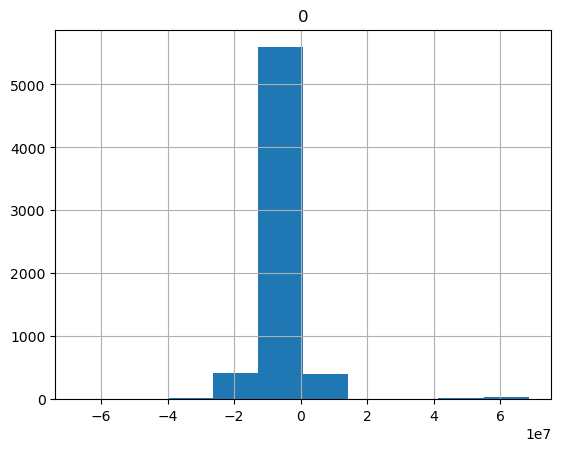

In [19]:
# Grafico del histograma de residuales para la base de prueba
dfh = pd.DataFrame(Resid)
dfh.hist()

In [20]:
# Reporte Automaizado de la regresion en Python
import statsmodels.api as sm

regressor = sm.OLS(y, x).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2333.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:42:10   Log-Likelihood:            -2.0676e+05
No. Observations:               15129   AIC:                         4.135e+05
Df Residuals:                   15115   BIC:                         4.137e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.217e+07   5.99e+05    -53.754      0.0

In [21]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [22]:
print('Coeficiente R cuadrado', r2_score(y_test, y_pred))

Coeficiente R cuadrado -528.3571919927898
